<font color='navy'> 
    
# MLflow Recipes for Data Preprocessing and Model Training  

</font>

## Introduction
Machine learning (ML) projects often involve various data preprocessing steps and model training phases. In this lab, we will demonstrate how to use MLflow Recipes to streamline and automate these processes. MLflow Recipes provide a convenient way to define and execute reusable steps for data ingestion, preprocessing, model training, and more. We will apply MLflow Recipes to the Customer Churn dataset, exploring data preprocessing techniques and training machine learning models for churn prediction.



## Objectives
The main objectives of this lab are:

1. To introduce the concept of MLflow Recipes for automating machine learning workflows.
2. To demonstrate how to use MLflow Recipes to define and execute data preprocessing and model training steps.
3. To compare and evaluate the performance of different machine learning models for income prediction.


## Tools and Libraries
For this lab, we will use the following tools and libraries:

1. Python 3.x
2. Jupyter Notebook
3. Pandas library for data manipulation and analysis
4. Numpy library for mathematical operations
5. Scikit-learn library for machine learning algorithms
6. Matplotlib library for data visualization
7. Seaborn library for data visualization
8. MLflow for managing machine learning experiments and pipelines

## Data
We will use the Customer Churn dataset for this lab. This dataset contains information about customers, including attributes like customer age, contract duration, and monthly charges. The goal is to predict whether a customer will churn (leave) or not based on these attributes.


## 1. Importing Libraries and Loading Data
Let's start by importing the necessary libraries and loading the Diabetes dataset.

In [1]:
#! pip install mlflow
#! pip install "flaml[automl]"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import os
from mlflow.recipes import Recipe
import mlflow


## 2. Load MLflow

In [3]:
# Load MLflow
%load_ext autoreload
%autoreload 2

## 3. Creating MLflow pipeline


#### 3.1 Defining the steps
Create an MLflow Recipe and define the steps for data preprocessing and model training.

In [4]:
# Create an MLflow Recipe
r = Recipe(profile="local")

# Clean the recipe
r.clean()

# Inspect the recipe
r.inspect()

# Run the 'ingest' step
r.run("ingest")

/home/jarla/.conda/envs/DVAE26/lib/python3.10/site-packages/mlflow/recipes/recipe.py:399: FutureWarning: MLflow Recipes is deprecated and will be removed in MLflow 3.0.
  warnings.warn(
2025/12/15 17:26:06 INFO mlflow.recipes.recipe: Creating MLflow Recipe 'Lab4' with profile: 'local'


2025/12/15 17:26:08 INFO mlflow.recipes.step: Running step ingest...



name,type
Account Length,integer
Area Code,integer
VMail Message,integer
Day Mins,number
Day Calls,integer
Day Charge,number
Eve Mins,number
Eve Calls,integer
Eve Charge,number
Night Mins,number


#### 3.2 Exploratory Data Analysis
Perform some basic Exploratory Data Analysis (EDA) on the ingested dataset. This step includes visualizing data distributions and relationships.

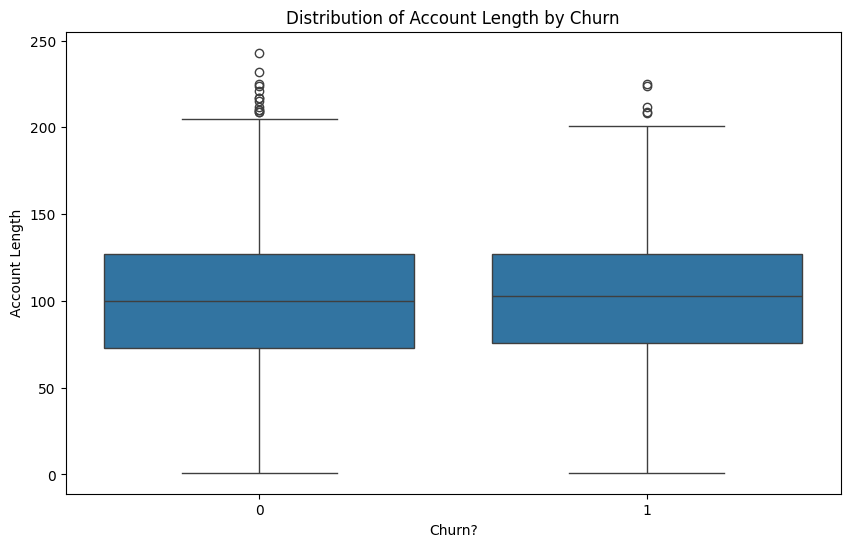

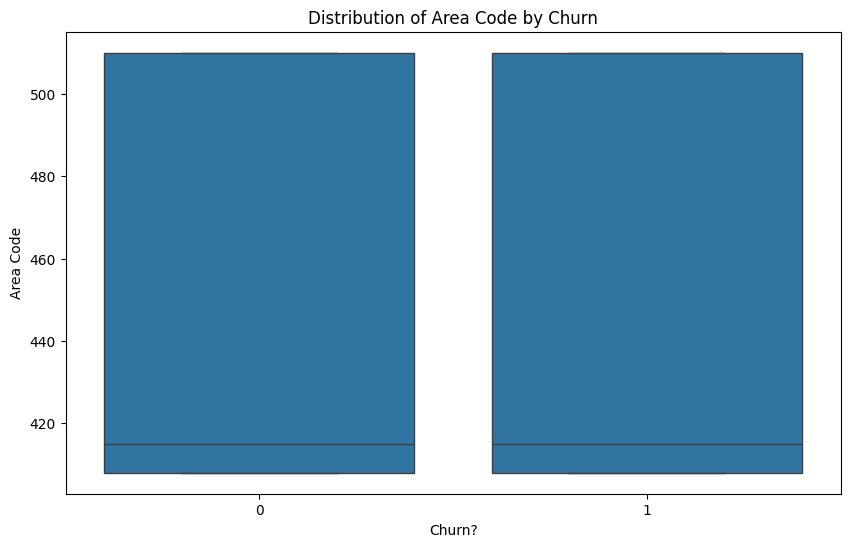

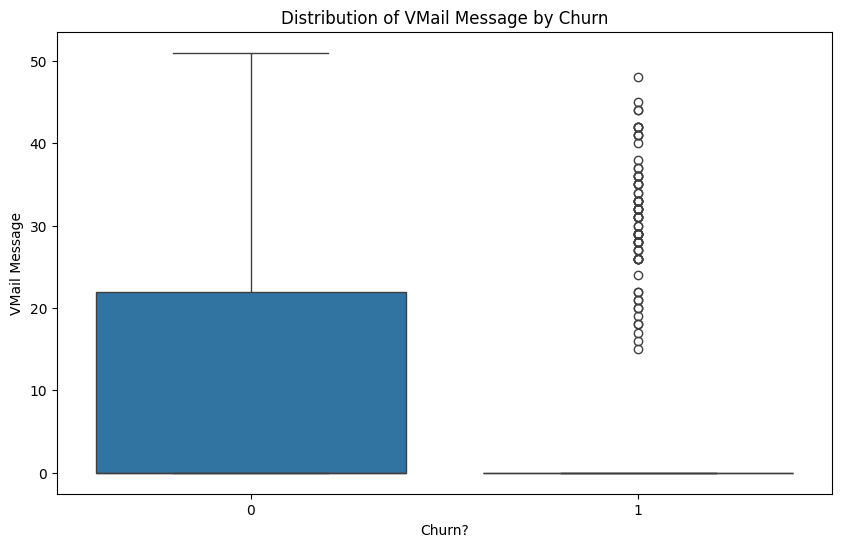

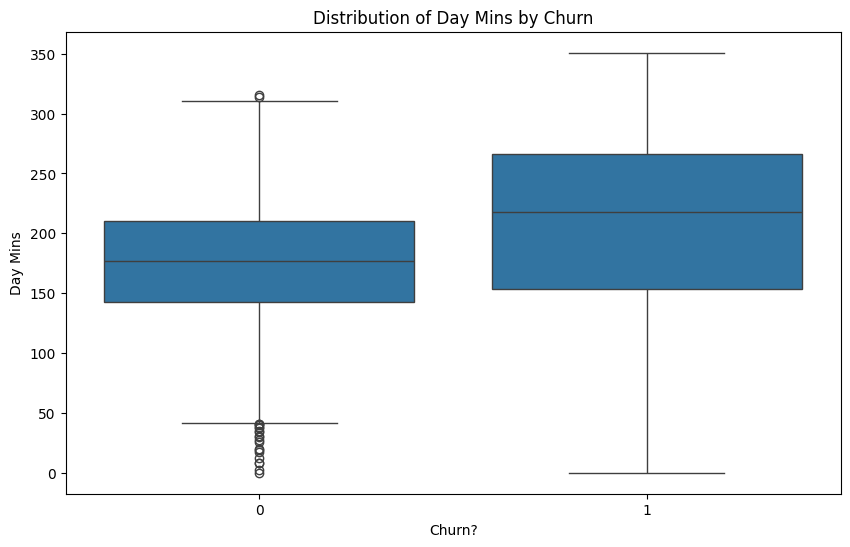

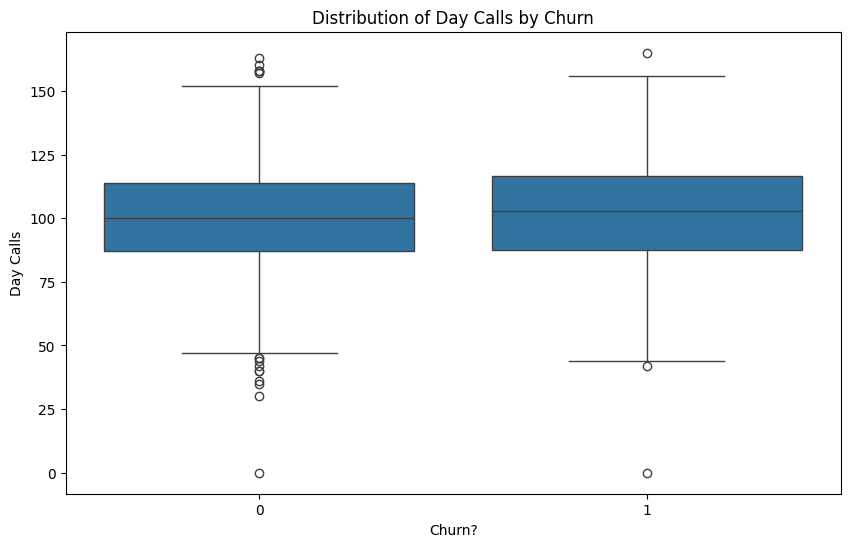

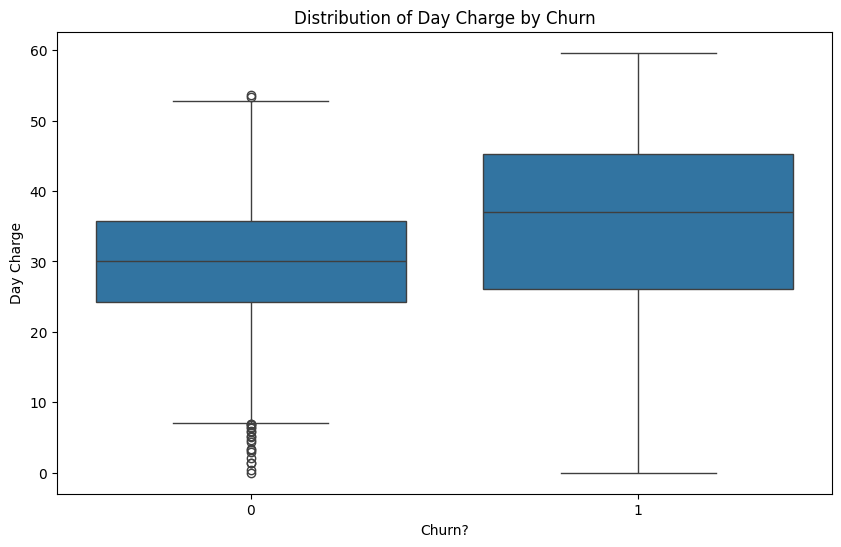

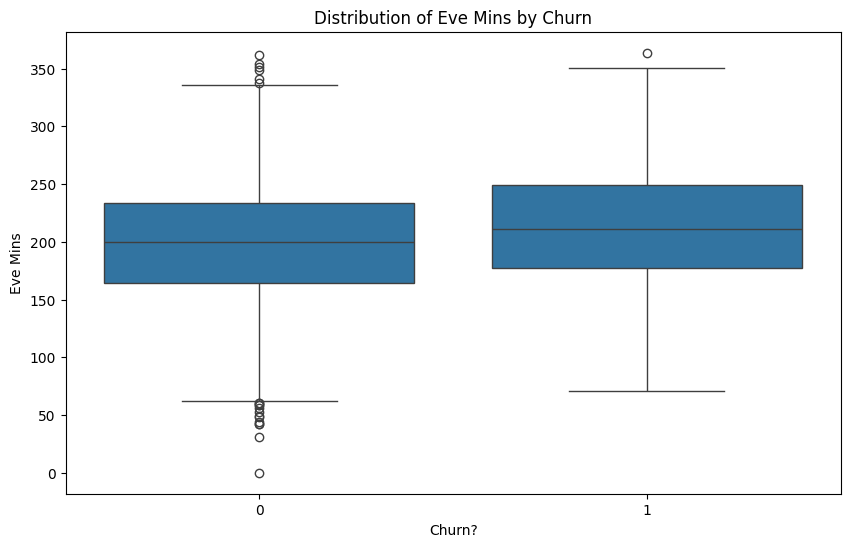

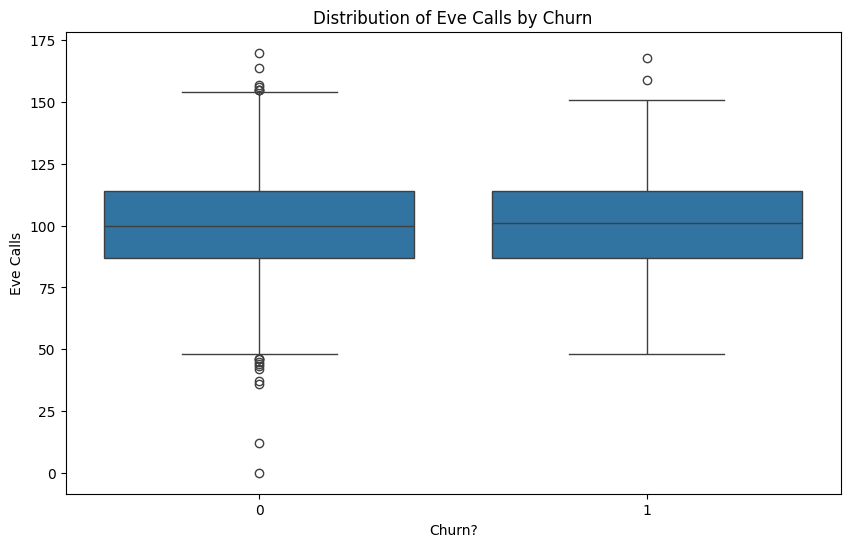

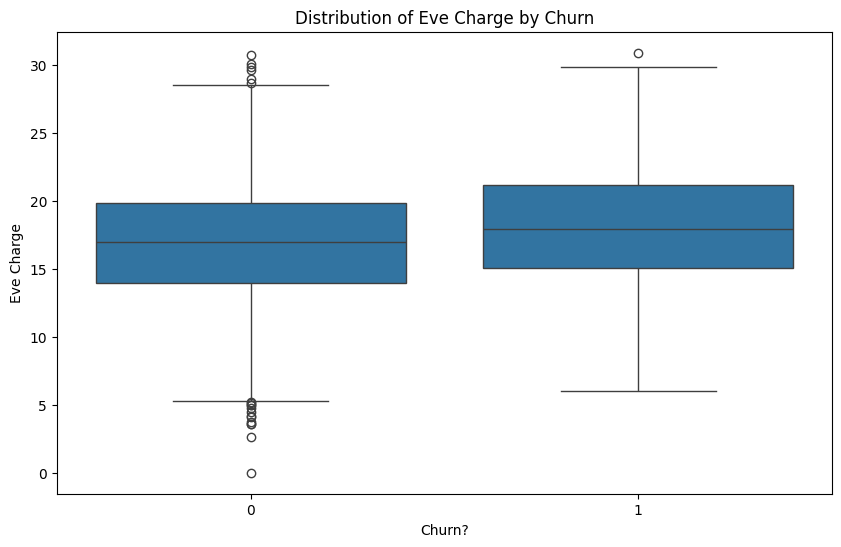

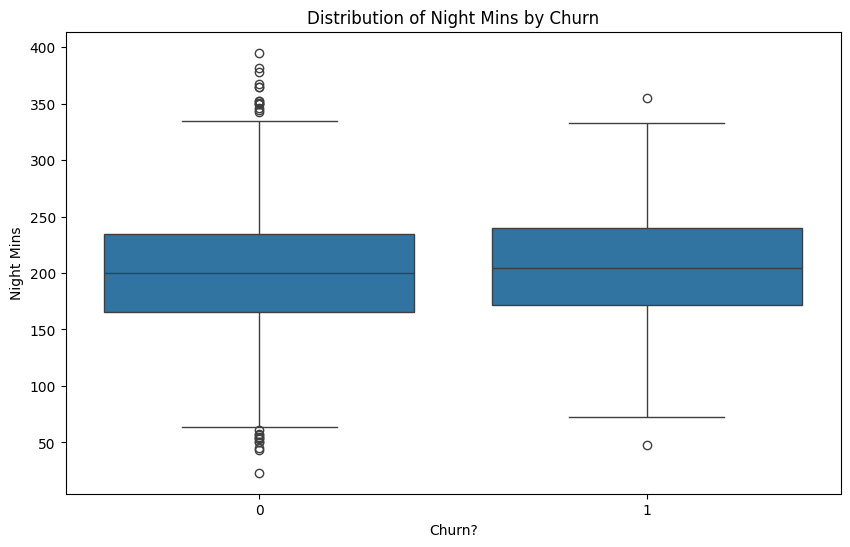

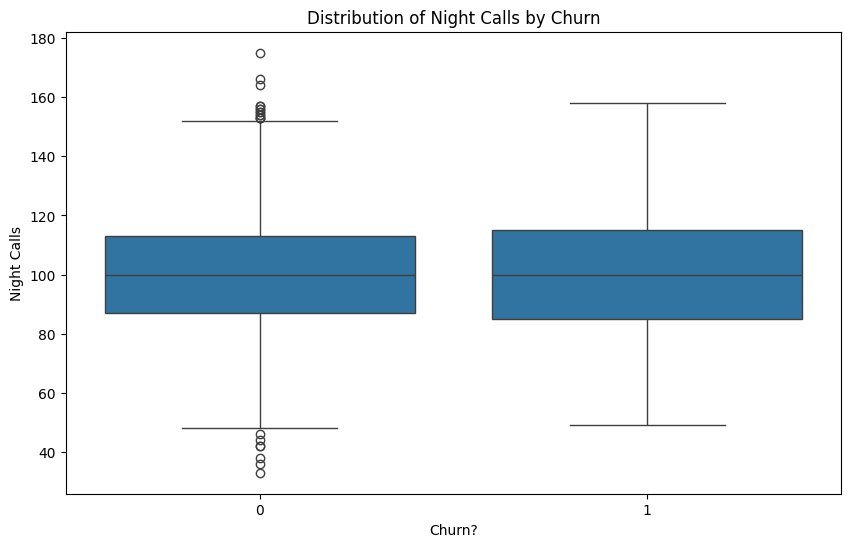

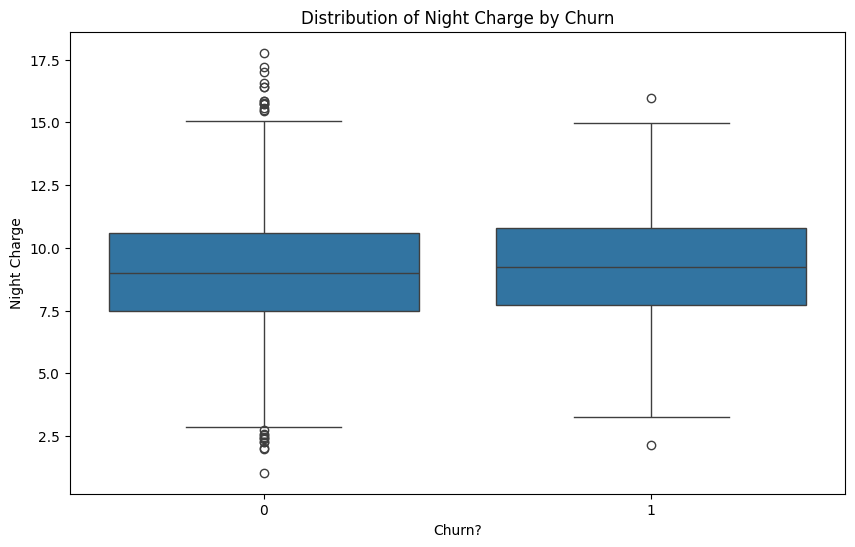

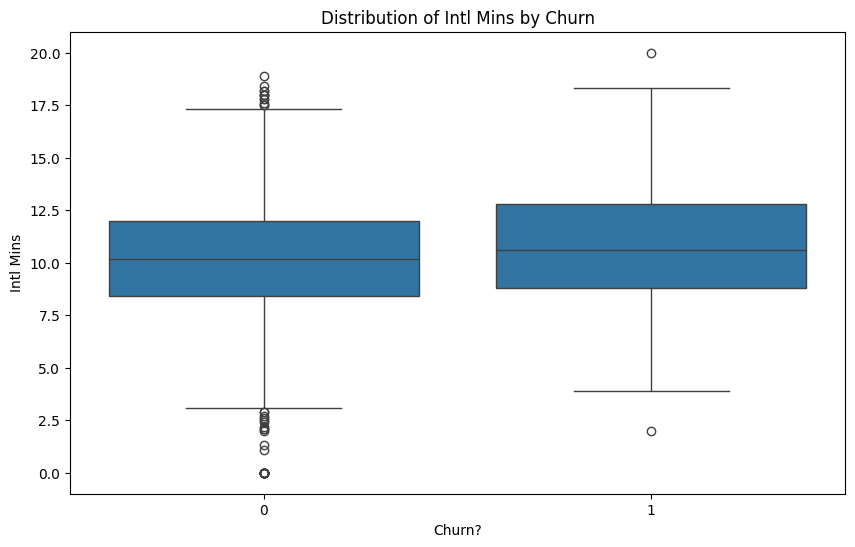

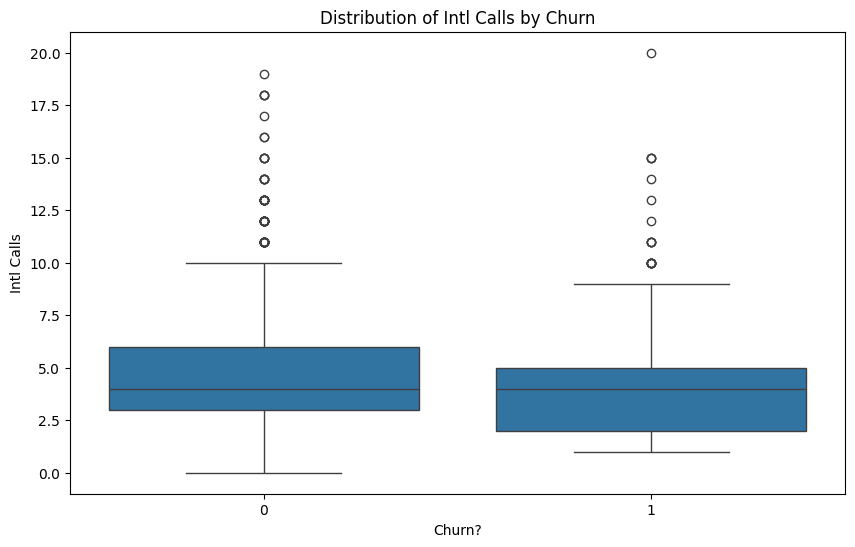

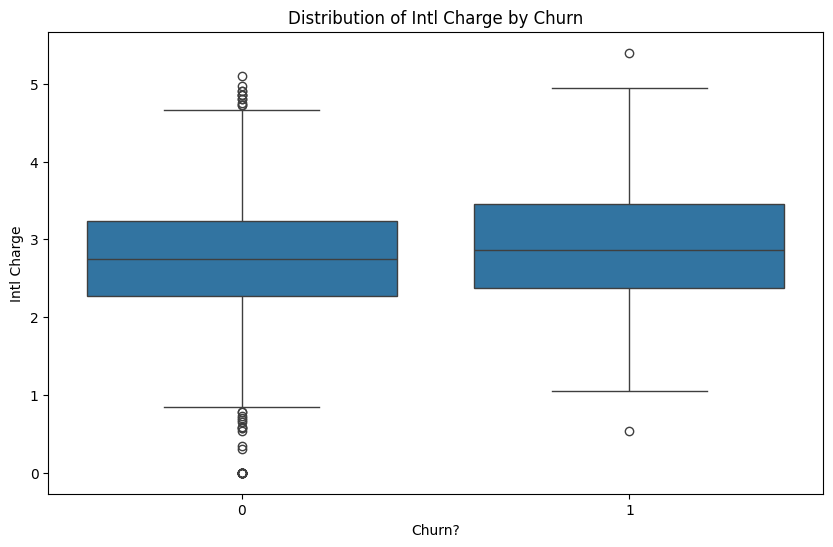

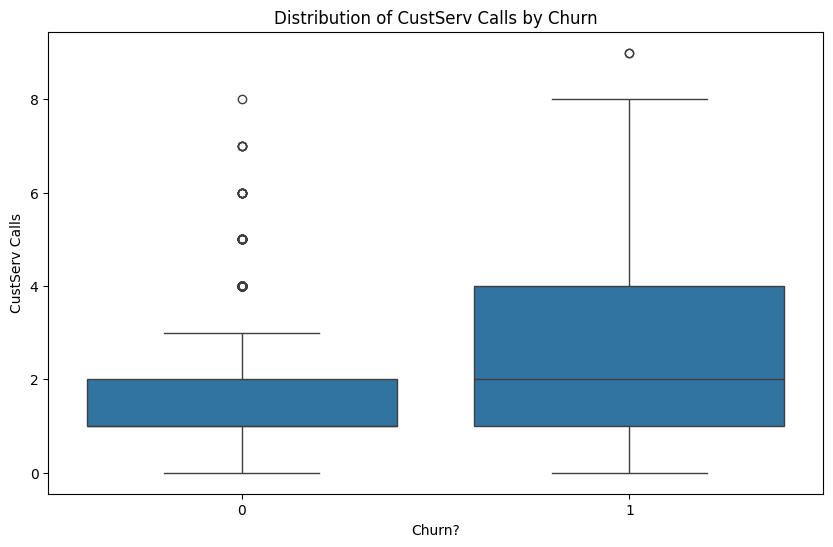

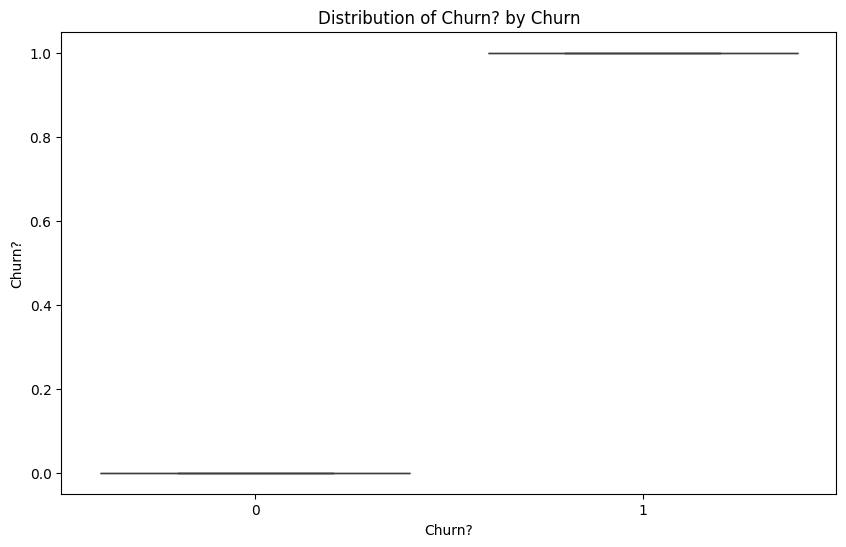

In [5]:
# Perform some basic EDA on the ingested dataset
ingested_data = r.get_artifact("ingested_data")
# Iterate through columns for EDA
for col in ingested_data.columns:
    if col == "Churn":  # Exclude the target variable
        continue

    plt.figure(figsize=(10, 6))

    if ingested_data[col].dtype == "object":  # Check if the column is non-numeric
        sns.countplot(data=ingested_data, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    else:
        sns.boxplot(data=ingested_data, x="Churn?", y=ingested_data[col])
        plt.title(f'Distribution of {col} by Churn')

    plt.show()


#### 3.3 Data Splitting
Run the 'split' step to split the data into training and testing sets.



In [6]:
# Run the 'split' step
r.run("split")

2025/12/15 17:26:11 INFO mlflow.recipes.utils.execution: ingest: No changes. Skipping.


Run MLflow Recipe step: split
2025/12/15 17:26:12 INFO mlflow.recipes.step: Running step split...
/home/jarla/.conda/envs/DVAE26/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


#### 3.4 Data Transformation
Run the 'transform' step for data transformation and feature scaling.



In [7]:
# Run the 'transform' step
r.run("transform")

2025/12/15 17:26:14 INFO mlflow.recipes.utils.execution: ingest, split: No changes. Skipping.


Run MLflow Recipe step: transform
2025/12/15 17:26:15 INFO mlflow.recipes.step: Running step transform...


,steps,"[('identity', ...)]"
,transform_input,None
,memory,None
,verbose,False
,func,None
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


#### 3.5 Data Training
Run the 'train' step to train machine learning models.



In [8]:
### Run the 'train' step
r.run("train")

2025/12/15 17:26:17 INFO mlflow.recipes.utils.execution: ingest, split, transform: No changes. Skipping.


Run MLflow Recipe step: train
2025/12/15 17:26:18 INFO mlflow.recipes.step: Running step train...
2025/12/15 17:26:19 INFO mlflow.recipes.steps.train: Training data has less than 5000 rows, skipping rebalancing.
[flaml.automl.logger: 12-15 17:26:22] {1752} INFO - task = classification
[flaml.automl.logger: 12-15 17:26:22] {1763} INFO - Evaluation method: cv
[flaml.automl.logger: 12-15 17:26:22] {1862} INFO - Minimizing error metric: 1-f1
[flaml.automl.logger: 12-15 17:26:22] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 12-15 17:26:22] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 12-15 17:26:22] {2417} INFO - Estimated sufficient time budget=1159s. Estimated necessary time budget=27s.
[flaml.automl.logger: 12-15 17:26:23] {2466} INFO -  at 0.2s,	estimator lgbm's best error=1.0000,	best estimator lgbm's best error=1.0000
[flaml.automl.logger: 12-15 17:26:23] {2282} 

Metric,training,validation
f1_score,0.931921,0.684685
accuracy_score,0.981891,0.91954
example_count,2485,435
false_negatives,45,31
false_positives,0,4
log_loss,0.0567025,0.264632
precision_recall_auc,0.999992,0.738768
precision_score,1,0.904762
recall_score,0.872521,0.550725
roc_auc,0.999999,0.839352


#### 3.6 Model Evaluation
Evaluate the trained models.


In [9]:
r.run("evaluate")

2025/12/15 17:36:56 INFO mlflow.recipes.utils.execution: ingest, split, transform, train: No changes. Skipping.


Run MLflow Recipe step: evaluate
2025/12/15 17:36:58 INFO mlflow.recipes.step: Running step evaluate...
2025/12/15 17:37:00 WARNING mlflow.models.evaluation.evaluators.classifier: According to the evaluation dataset label values, the model type looks like None, but you specified model type 'classifier'. Please verify that you set the `model_type` and `dataset` arguments correctly.
2025/12/15 17:37:01 INFO mlflow.models.evaluation.evaluators.classifier: The evaluation dataset is inferred as binary dataset, positive label is 1, negative label is 0.
2025/12/15 17:37:01 INFO mlflow.models.evaluation.default_evaluator: Testing metrics on first row...
2025/12/15 17:37:02 WARNING mlflow.models.evaluation.evaluators.shap: SHAP or matplotlib package is not installed, so model explainability insights will not be logged.
2025/12/15 17:37:02 WARNING mlflow.models.evaluation.evaluators.classifier: According to the evaluation dataset label values, the model type looks like None, but you specified mo

Metric,validation,test
f1_score,0.684685,0.705882
accuracy_score,0.91954,0.927361
example_count,435,413.000000
false_negatives,31,25.000000
false_positives,4,5.000000
log_loss,0.264632,0.221441
precision_recall_auc,0.738768,0.789499
precision_score,0.904762,0.878049
recall_score,0.550725,0.590164
roc_auc,0.839352,0.903083


#### 3.6 Model Registry
Register and store the trained models.


In [10]:
r.run("register")

2025/12/15 17:37:04 INFO mlflow.recipes.utils.execution: ingest, split, transform, train, evaluate: No changes. Skipping.


Run MLflow Recipe step: register
2025/12/15 17:37:06 INFO mlflow.recipes.step: Running step register...
Registered model 'churn_classifier' already exists. Creating a new version of this model...
Created version '2' of model 'churn_classifier'.


## Task 1: ML Models Performance Comparison

**Purpose:** Compare the performance of multiple machine learning models for churn prediction.

**Instructions:**

1. In the `3.5 Data Training` section, modify `train.py` to train classifiers other than Random Forests. For instance, consider using models like Logistic Regression.
2. After training the additional models, conduct a thorough evaluation of their performance on the test dataset.
3. Compare the performance of each machine learning model run. Ensure you have recorded the run ID for each model.
4. Provide explanatory comments to explain the significance of model comparison and highlight any insights derived from the evaluation.
5. Conclude by discussing which model appears to be the most suitable for the churn prediction task based on the evaluation results.

Logistic regression is unsuitable due to extremely low recall (0.148) and F1 score (0.25) indicating failure to identify churners.
Random Forest is the most suitable model, as it demonstrates superior performance on metrics critical for imbalanced classification, particularly recall (0.475), F1 score (0.617), and precision-recall AUC (0.756).

## Task 2: Automated Model Selection with automl/flaml


**Purpose:** Utilize the FLAML (Fast, Lightweight, and Multi-Layered) library for automated model selection.

**Instructions:**

1. Install flaml Python library using the command:  `pip install "flaml[automl]"`.
2. Configure FLAML to perform automated machine learning tasks, including hyperparameter tuning, algorithm selection, and model evaluation. Hint: you need to modify the `recipe.yaml` file.
3. Discuss the benefits and limitations of using automated model selection with FLAML in comparison to manual model selection.

In comparison to manual model selection, FLAML offers speed, systematic exploration, and strong baseline performance, but at the cost of reduced interpretability, lower transparency, and reliance on correct metric and validation design. In this assignment, FLAML's selection of an ExtraTreees model demonstrate its effectiveness for tabular, imbalanced classification tasks, while manual model selection remains valuable for interpretabilityu and domain-driven modeling decisions.